## Usage

The example below uses a modified version of the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic), which can be found in this GitRepo [here](../tests/data/titanic.csv). 

In [1]:
from advanced_value_counts.avc import AdvancedValueCounts
import pandas as pd

# read in the data file
df = pd.read_csv('../tests/data/titanic.csv', usecols=['CabinArea','Title'])
df.head()

,CabinArea,Title
0,NaN,Mr.
1,C,Mrs.
2,NaN,Miss.
3,C,Mrs.
4,NaN,Mr.


In [2]:
# create an instance of AdvancedValueCounts
avc = AdvancedValueCounts(df=df, column='Title')

# print the AdvancedValueCounts DataFrame
avc.avc_df

,ratio,count
Title,,
Mr.,0.580247,517
Miss.,0.204265,182
Mrs.,0.140292,125
Master.,0.044893,40
_na,0.007856,7
Rev.,0.006734,6
Major.,0.002245,2
Col.,0.002245,2
Mlle.,0.002245,2


Set `min_group_count` to 5 to group small groups into `'_other'` group

In [3]:
avc.min_group_count = 5
avc.avc_df

,ratio,count
Title,,
Mr.,0.580247,517
Miss.,0.204265,182
Mrs.,0.140292,125
Master.,0.044893,40
_other,0.015713,14
_na,0.007856,7
Rev.,0.006734,6


Parameters of the `AdvancedValueCounts` class to adjust for small groups for a single column: 

In [4]:
dropna: bool = False
min_group_count: int = 1 # does not effect NA or the '_other' group
min_group_ratio: float = 0 # does not effect NA or the '_other' group

It is also possible to use `column` in combination with parameter `groupy_col: str = None` to mimick the behaviour of `df.groupby(groupby_col)[column].value_counts()`

In [5]:
avc_grouped = AdvancedValueCounts(df=df, column='Title', groupby_col='CabinArea')
avc_grouped.avc_df

count  subgroup_ratio  subgr_r_diff_subgr_all  r_vs_total
CabinArea Title                                                             
A         Col.         1        0.066667                0.064422    0.001122
          Lady.        1        0.066667                0.065544    0.001122
          Master.      1        0.066667                0.021773    0.001122
          Mr.         11        0.733333                0.153086    0.012346
          Sir.         1        0.066667                0.065544    0.001122
...                  ...             ...                     ...         ...
_na       Mrs.        81        0.117904               -0.022388    0.090909
          Ms.          1        0.001456                0.000333    0.001122
          Rev.         6        0.008734                0.002000    0.006734
          _na          4        0.005822               -0.002034    0.004489
          _total     687        1.000000                0.000000    0.771044

[74 rows x 4 columns]

To get a better overview of the data, set attributes to adjust group size and round the ratios

In [6]:
avc_grouped.min_group_ratio = 0.05
avc_grouped.min_subgroup_count = 5
avc_grouped.round_ratio = 3
avc_grouped.avc_df

count  subgroup_ratio  subgr_r_diff_subgr_all  r_vs_total
CabinArea Title                                                             
B         Miss.       14           0.298                   0.094       0.016
          Mr.         16           0.340                  -0.240       0.018
          Mrs.        10           0.213                   0.073       0.011
          _na          1           0.021                   0.013       0.001
          _other       6           0.127                   0.111       0.007
          _total      47           1.000                   0.000       0.053
C         Miss.       12           0.203                  -0.001       0.013
          Mr.         29           0.492                  -0.088       0.033
          Mrs.        14           0.237                   0.097       0.016
          _na          1           0.017                   0.009       0.001
          _other       3           0.051                   0.035       0.003
          _total      59           1.000                   0.000       0.066
_all      Master.     40           0.045                     NaN       0.045
          Miss.      182           0.204                     NaN       0.204
          Mr.        517           0.580                     NaN       0.580
          Mrs.       125           0.140                     NaN       0.140
          Rev.         6           0.007                     NaN       0.007
          _na          7           0.008                     NaN       0.008
          _other      14           0.016                     NaN       0.016
          _total     891           1.000                     NaN       1.000
_na       Master.     33           0.048                   0.003       0.037
          Miss.      135           0.197                  -0.007       0.152
          Mr.        424           0.617                   0.037       0.476
          Mrs.        81           0.118                  -0.022       0.091
          Rev.         6           0.009                   0.002       0.007
          _na          4           0.006                  -0.002       0.004
          _other       4           0.006                  -0.010       0.004
          _total     687           1.000                   0.000       0.771
_other    Master.      5           0.051                   0.006       0.006
          Miss.       21           0.214                   0.010       0.024
          Mr.         48           0.490                  -0.090       0.054
          Mrs.        20           0.204                   0.064       0.022
          _na          1           0.010                   0.002       0.001
          _other       3           0.031                   0.015       0.003
          _total      98           1.000                   0.000       0.110

Parameters of the `AdvancedValueCounts` class to adjust for groupsize in a grouped-by `AdvancedValueCounts` <br>

In [7]:
# for groupby_col:
dropna: bool = False
max_groups: int = None # does not effect NA or the '_other' group
min_group_count: int = 1 # does not effect NA or the '_other' group
min_group_ratio: float = 0 # does not effect NA or the '_other' group

# for column:
dropna: bool = False
max_subgroups: int = None # does not effect NA or the '_other' group
min_subgroup_count: int = 1 # does not effect NA or the '_other' group
min_subgroup_ratio: float = 0 # does not effect NA or the '_other' group
min_subgroup_ratio_vs_total: float = 0 # does not effect NA or the '_other' group

To get a plot of the `AdvancedValueCounts.avc_df`:

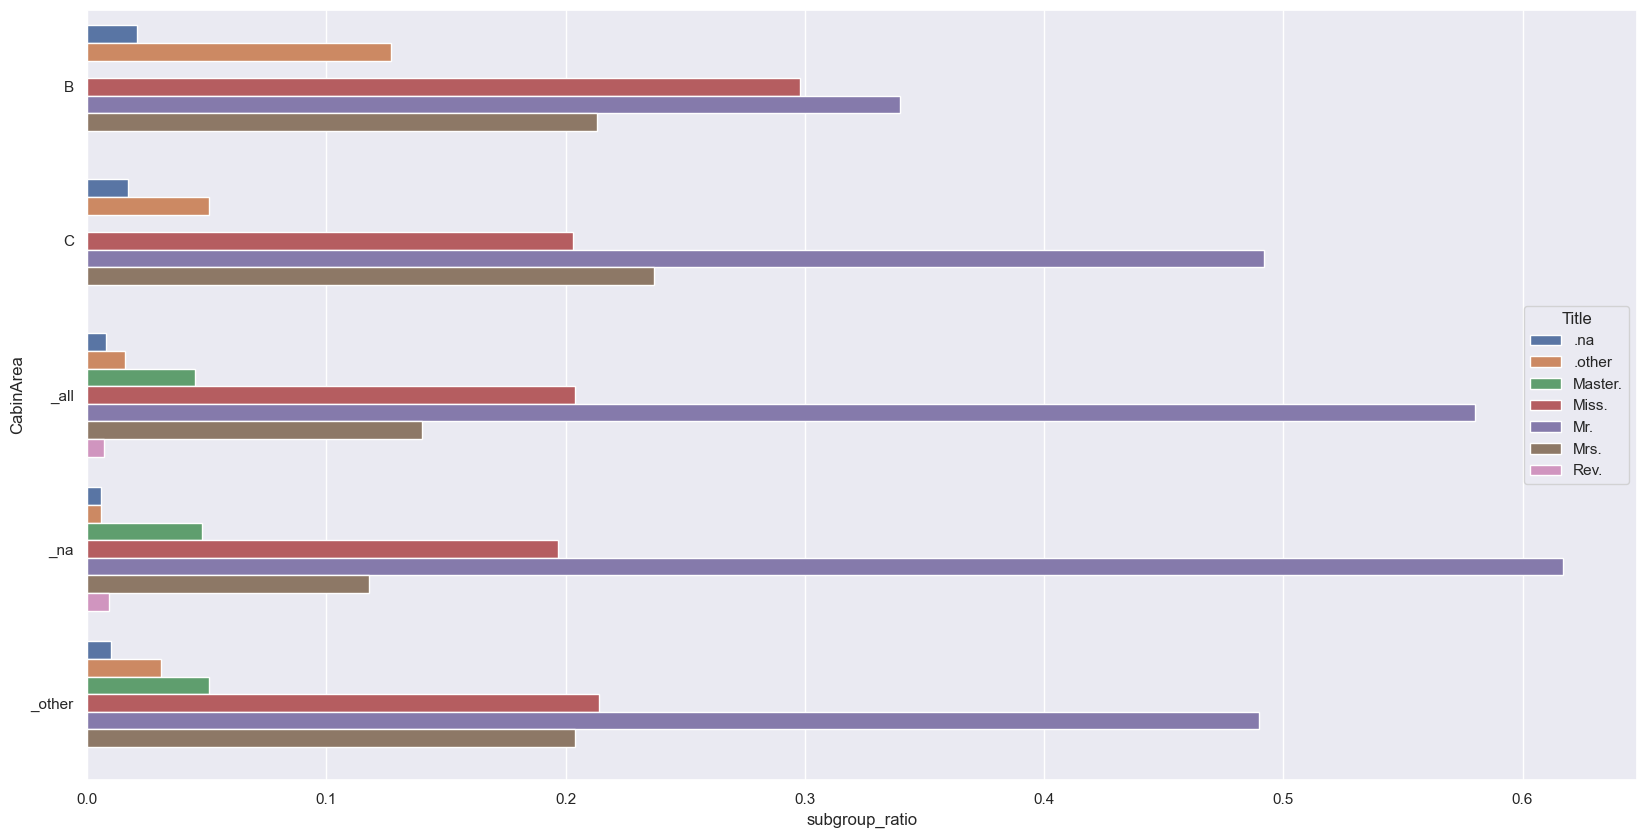

In [8]:
avc_grouped.get_plot(normalize=True) # normalize = True is default value

To get a DataFrame without the summary_statistics such as `'_all'` and `'_total'`:

In [9]:
avc_grouped.unsummerized_df

count  subgroup_ratio  subgr_r_diff_subgr_all  r_vs_total
CabinArea Title                                                             
B         Miss.       14           0.298                   0.094       0.016
          Mr.         16           0.340                  -0.240       0.018
          Mrs.        10           0.213                   0.073       0.011
          _na          1           0.021                   0.013       0.001
          _other       6           0.127                   0.111       0.007
C         Miss.       12           0.203                  -0.001       0.013
          Mr.         29           0.492                  -0.088       0.033
          Mrs.        14           0.237                   0.097       0.016
          _na          1           0.017                   0.009       0.001
          _other       3           0.051                   0.035       0.003
_na       Master.     33           0.048                   0.003       0.037
          Miss.      135           0.197                  -0.007       0.152
          Mr.        424           0.617                   0.037       0.476
          Mrs.        81           0.118                  -0.022       0.091
          Rev.         6           0.009                   0.002       0.007
          _na          4           0.006                  -0.002       0.004
          _other       4           0.006                  -0.010       0.004
_other    Master.      5           0.051                   0.006       0.006
          Miss.       21           0.214                   0.010       0.024
          Mr.         48           0.490                  -0.090       0.054
          Mrs.        20           0.204                   0.064       0.022
          _na          1           0.010                   0.002       0.001
          _other       3           0.031                   0.015       0.003